## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [137]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [138]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [140]:
data = data.drop('Id', axis=1)
# Столбец индекс бесполезный, так как строки и так пронумерованы  

In [141]:
print(data)
print('--------------')
uniq_data = data.nunique().to_frame(name='Unique Count')
print(uniq_data[uniq_data['Unique Count'] < 3])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...  

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [142]:
data.isnull().any().any()

True

True -> в данных есть пропуски

In [143]:
data_nan_count = data.isna().sum()
data_nan_count = data_nan_count[data_nan_count > 0]
data_nan_count = data_nan_count.to_frame(name='Nan count')
data_nan_count['Percentage of the total number of values'] = data_nan_count['Nan count'] / data.shape[0]
data_nan_count["Type"] = data.dtypes[data_nan_count.index]
data_nan_count


,Nan count,Percentage of the total number of values,Type
LotFrontage,259,0.177397,float64
Alley,1369,0.937671,object
MasVnrType,872,0.597260,object
MasVnrArea,8,0.005479,float64
BsmtQual,37,0.025342,object
BsmtCond,37,0.025342,object
BsmtExposure,38,0.026027,object
BsmtFinType1,37,0.025342,object
BsmtFinType2,38,0.026027,object
Electrical,1,0.000685,object


In [144]:
for column in data_nan_count.index:
    if data_nan_count.loc[column, 'Percentage of the total number of values'] > 0.9:
        data = data.drop(column, axis=1)

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [145]:
for column in data:
    data[column] = data[column].fillna(data[column].mode()[0] if data[column].dtype == 'object' else data[column].mean())

В столбцах, где процент Nan меньше 90 процентов заменяем их на моду или среднее значение

✅ Проверьте, что вы действительно избавились от пропусков

In [146]:
data.isnull().any().any()

False

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [147]:
columns = [column for column in data if data[column].dtype == 'object']

for column in columns:
    print(data[column].unique())


['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [148]:
for column in columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Я использовал label encoding так как при one hot получается слишком много признаков

✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [150]:
corr_matrix = data.corr()
print(data.shape)
print(corr_matrix.shape)
print(corr_matrix.columns)

(1460, 77)
(77, 77)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

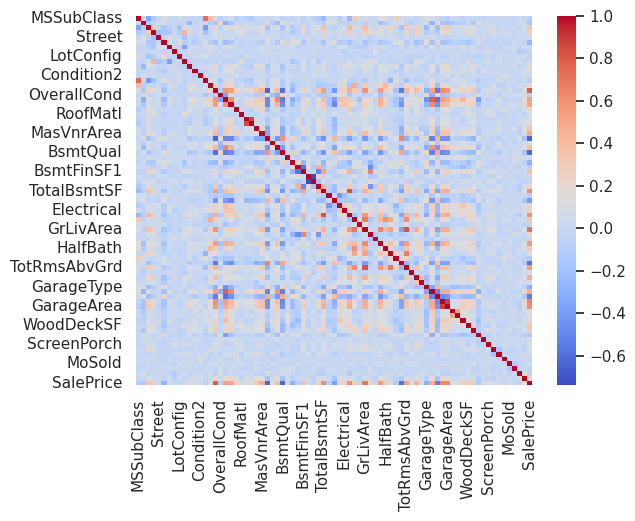

In [151]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [160]:
corr_with_target = data.corr()['SalePrice'].drop('SalePrice').abs()

max_corr_feature = corr_with_target.idxmax()
max_corr_value = corr_with_target.max()

print(f'Признак с максимальной корреляцией с ценой: {max_corr_feature}')
print(f'Значение корреляции: {max_corr_value}')

min_corr_feature = corr_with_target.idxmin()
min_corr_value = corr_with_target.min()

print(f'Признак с минимальной корреляцией с ценой: {min_corr_feature}')
print(f'Значение корреляции: {min_corr_value}')

Признак с максимальной корреляцией с ценой: OverallQual
Значение корреляции: 0.7909816005838053
Признак с минимальной корреляцией с ценой: Condition2
Значение корреляции: 0.0075127340363331


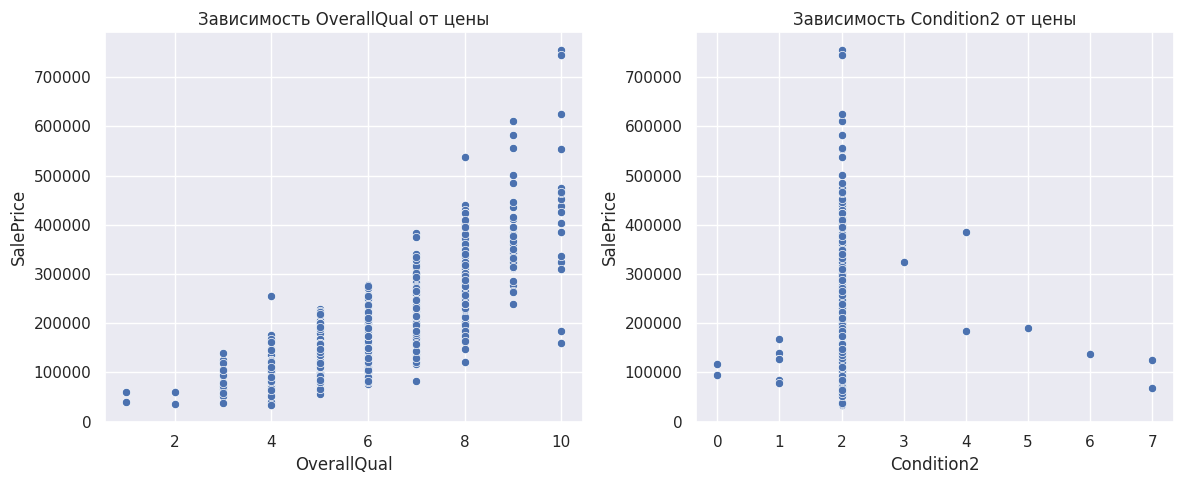

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=data[max_corr_feature], y=data['SalePrice'], ax=axes[0])
axes[0].set_title(f'Зависимость {max_corr_feature} от цены')

sns.scatterplot(x=data[min_corr_feature], y=data['SalePrice'], ax=axes[1])
axes[1].set_title(f'Зависимость {min_corr_feature} от цены')

plt.tight_layout()
plt.show()

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

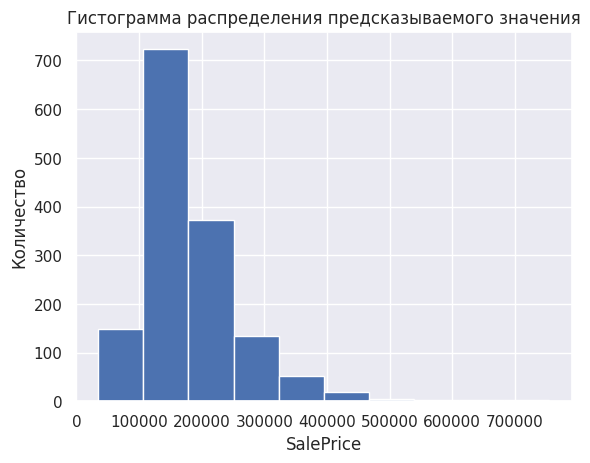

In [166]:
plt.hist(data['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Количество')
plt.title('Гистограмма распределения предсказываемого значения')
plt.show()

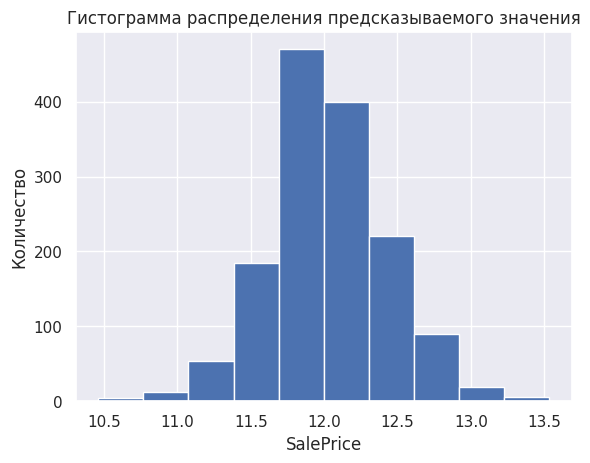

In [167]:
data['SalePrice'] =  np.log1p(data['SalePrice'])
plt.hist(data['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Количество')
plt.title('Гистограмма распределения предсказываемого значения')
plt.show()

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [ ]:
y = data['SalePrice']
data = data.drop('SalePrice', axis=1)

In [170]:
# Прологорифмировал в предудыщем задании уже столбец
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state=13)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [180]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [176]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [182]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]

In [189]:
grid_lasso = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring = 'neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [190]:
grid_ridge = GridSearchCV(estimator = ridge, param_grid = dict(alpha=alphas), scoring = 'neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [191]:
print('MSE test ', mean_squared_error(y_test, grid_lasso.predict(X_test)))
print('RMSE test ', mean_squared_error(y_test, grid_lasso.predict(X_test)) ** 0.5)
print('R^2 test ', r2_score(y_test, grid_lasso.predict(X_test)))
print('-----------------------')
print('MSE test ', mean_squared_error(y_test, grid_ridge.predict(X_test)))
print('RMSE test ', mean_squared_error(y_test, grid_ridge.predict(X_test)) ** 0.5)
print('R^2 test ', r2_score(y_test, grid_ridge.predict(X_test)))

MSE test  0.052926570986260996
RMSE test  0.23005775576202814
R^2 test  0.6794150227234041
-----------------------
MSE test  0.05281038990208247
RMSE test  0.2298051128719343
R^2 test  0.6801187507287763


✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

In [197]:
best_model_lasso = grid_lasso.best_estimator_
best_model_ridge = grid_ridge.best_estimator_

weights_lin = lin_reg.coef_
weights_lasso = best_model_lasso.coef_
weights_ridge = best_model_ridge.coef_

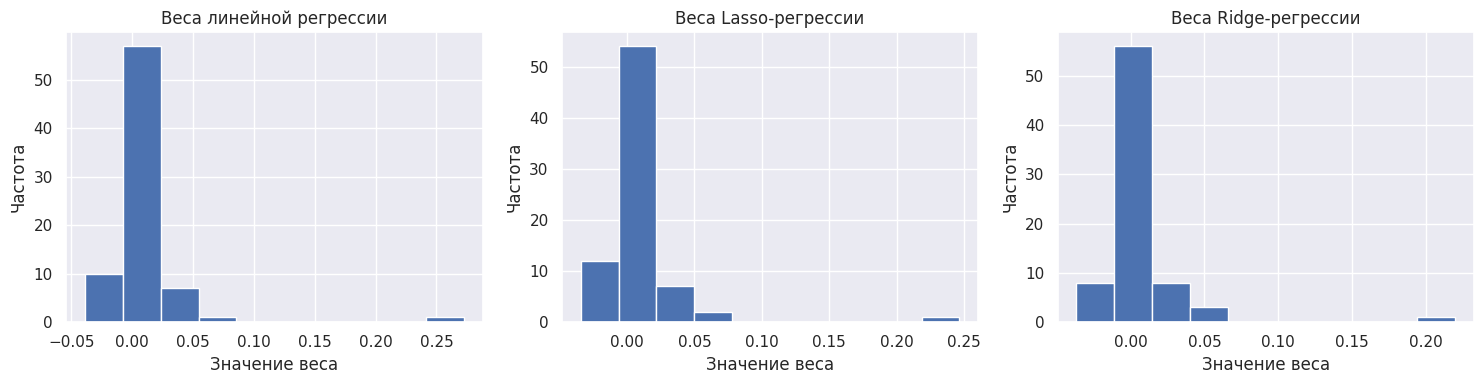

In [199]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(weights_lin)
plt.title("Веса линейной регрессии")
plt.xlabel("Значение веса")
plt.ylabel("Частота")

plt.subplot(1, 3, 2)
plt.hist(weights_lasso)
plt.title("Веса Lasso-регрессии")
plt.xlabel("Значение веса")
plt.ylabel("Частота")

plt.subplot(1, 3, 3)
plt.hist(weights_ridge)
plt.title("Веса Ridge-регрессии")
plt.xlabel("Значение веса")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()